In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from multiprocessing import Pool
import multiprocessing as mp
import m5_team_fn as fn
import time

In [ ]:
if __name__ == '__main__':
    s_time = time.time()
    path = './data/'
    data_name = 'review.csv'
    full_name = path + data_name
    df = pd.read_csv(full_name)
    df_split = fn.splitDataFrame(df, mp.cpu_count())
    teachers = list(df['teacher_name'].unique())
    
    total_results = dict()
    total_cnt = dict()

    for teacher in teachers:
        with Pool(mp.cpu_count()) as pool:
            results = pool.starmap(fn.countWord, [(part, teacher) for part in df_split])
        total_results[teacher] = results

        cnt_dict = dict()
        for result in results:
            for key in result:
                cnt_dict[key] = cnt_dict.get(key, 0) + result[key]
        total_cnt[teacher] = cnt_dict
    e_time = time.time()
    print(e_time - s_time)

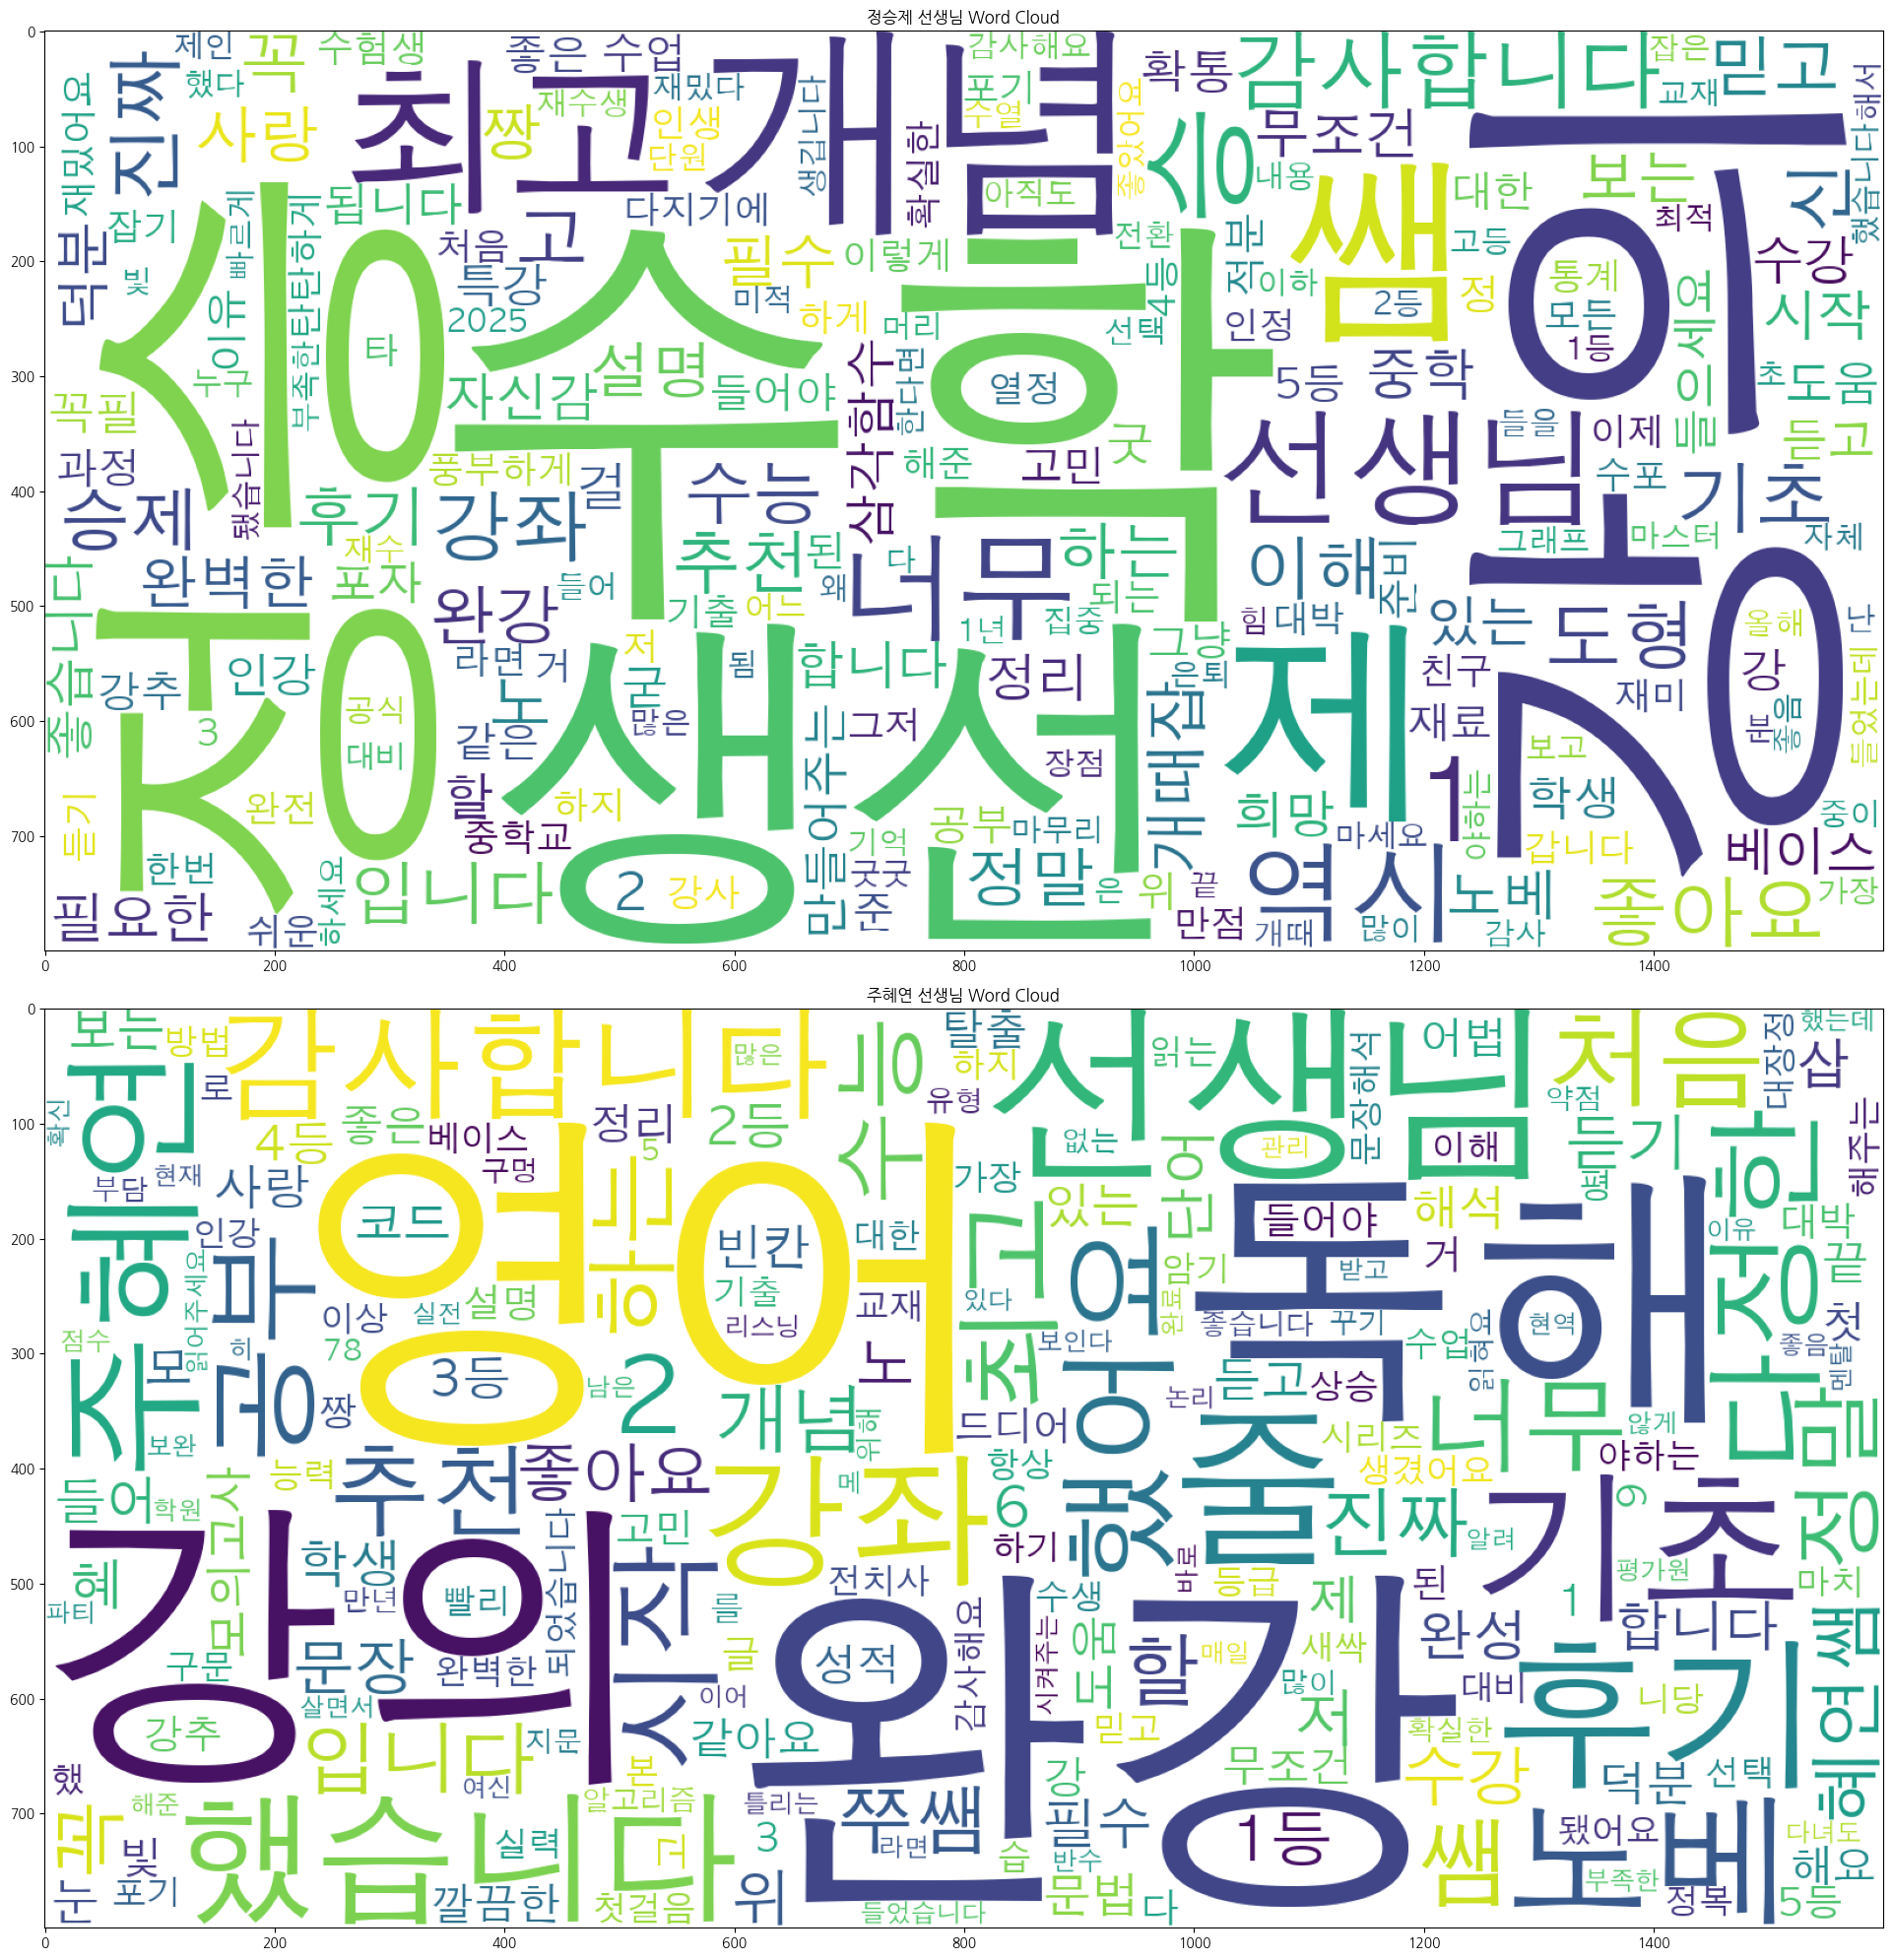

In [ ]:
math = total_cnt['정승제 선생님']
eng = total_cnt['주혜연 선생님']

plt.rcParams['font.family'] ='Nanum Gothic'
plt.figure(figsize=(40,20))

plt.subplot(211)
wc = WordCloud(
    font_path='AppleGothic',
    max_words=200,
    height=800,
    width=1600,
    background_color='white'
    )
math_img = wc.generate_from_frequencies(math)
plt.imshow(math_img)
plt.title('정승제 선생님 Word Cloud')

plt.subplot(212)
wc = WordCloud(
    font_path='AppleGothic',
    max_words=200,
    height=800,
    width=1600,
    background_color='white'
    )
eng_img = wc.generate_from_frequencies(eng)
plt.imshow(eng_img)
plt.title('주혜연 선생님 Word Cloud')
plt.tight_layout();